In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("spam.csv",encoding='latin')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3038,ham,"Wishing you and your family Merry \X\"" mas and...",NaN,NaN,NaN
882,ham,I love to give massages. I use lots of baby oi...,NaN,NaN,NaN
2350,ham,You will be in the place of that man,NaN,NaN,NaN
734,ham,Leaving to qatar tonite in search of an opport...,NaN,NaN,NaN
3333,ham,"That's fine, have him give me a call if he kno...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

## 1. DATA CLEANING

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
#dropping last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
df.sample(5)

,v1,v2
4802,ham,How do you plan to manage that
2884,ham,ÌÏ still attending da talks?
1814,ham,HI ITS JESS I DONT KNOW IF YOU ARE AT WORK BUT...
3672,ham,Moji just informed me that you saved our lives...
13,ham,I've been searching for the right words to tha...


In [8]:
#columnn renaming
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
1294,ham,Aiyah u did ok already lar. E nydc at wheellock?
3328,ham,Sac will score big hundred.he is set batsman:-)
1595,ham,Pls confirm the time to collect the cheque.
4573,ham,:( but your not here....
1166,ham,I am not having her number sir


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['target']=encoder.fit_transform(df['target'])
df.head(5)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
#checking for missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [11]:
#checking for duplicates
df.duplicated().sum()

np.int64(403)

In [14]:
df.drop_duplicates(keep='first',inplace=True)
df.shape

(5169, 2)

## 2.EDA- for getting an understanding of data

In [15]:
df.value_counts('target')

target
0    4516
1     653
Name: count, dtype: int64

[]

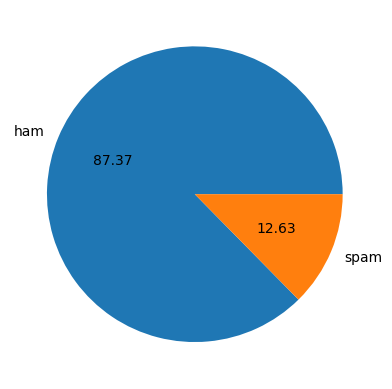

In [16]:
#clearly,data is imbalance->more ham than spam
import matplotlib.pyplot as plt
plt.pie(df.value_counts('target'),labels=['ham','spam'],autopct="%0.2f")
plt.plot()

In [102]:
!pip install nltk


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\theja\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
#finding no.of characters,words and sentences in each record
df['num_characters']=df['text'].apply(len)
df.head(5)

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [19]:
nltk.download('punkt_tab')
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\theja\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [20]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [21]:
df.sample(10)

,target,text,num_characters,num_words,num_sentences
4129,0,And by when you're done I mean now,34,9,1
4218,0,Anything lor if they all go then i go lor...,44,11,1
439,0,But i have to. I like to have love and arrange.,47,13,2
4092,0,"\Life is nothing wen v get everything\"". But \...",163,37,3
3301,0,Stop calling everyone saying I might have canc...,165,35,4
2560,0,Are you still getting the goods.,32,7,1
919,0,Dont talk to him ever ok its my word.,37,10,1
1075,0,Oi. Ami parchi na re. Kicchu kaaj korte iccha ...,83,23,6
1961,0,LOL that would be awesome payback.,34,7,1
187,1,Please call our customer service representativ...,149,25,1


In [22]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [23]:
#ham
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [24]:
#spam
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

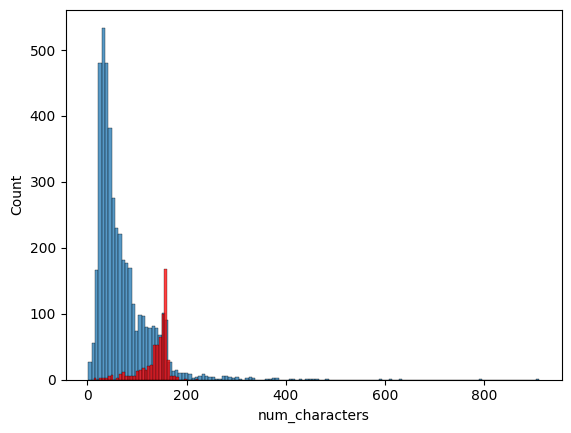

In [25]:
import seaborn as sns
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

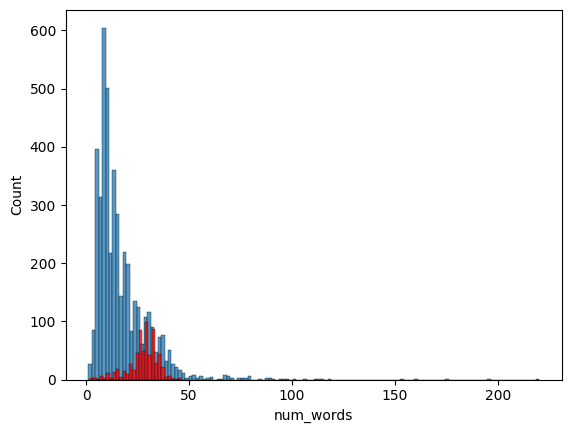

In [26]:
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

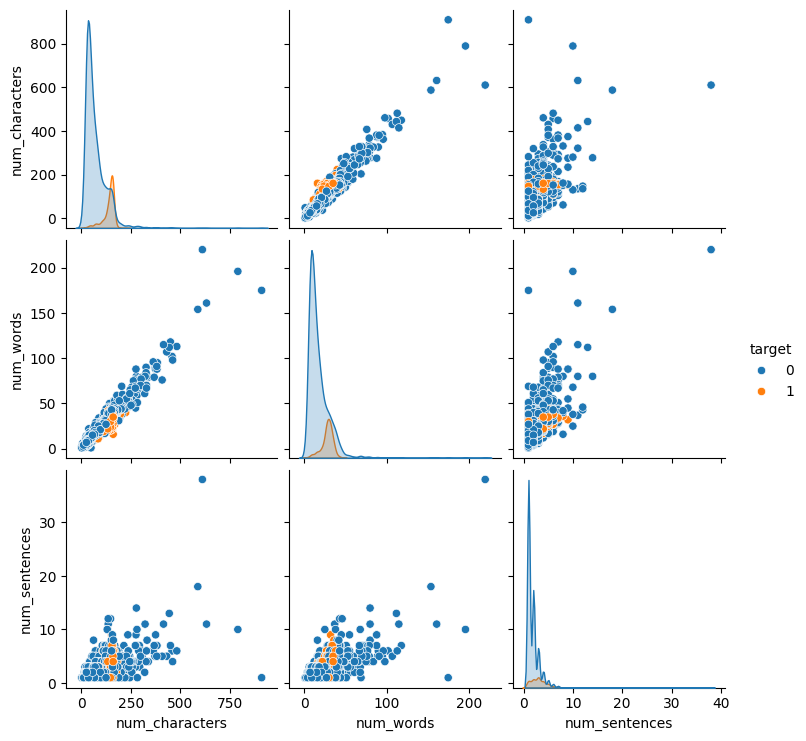

In [27]:
sns.pairplot(df,hue='target')

## 3.DATA PREPROCESSING
1. Lowecase
2. Tokenization
3. Removing special characters
4. Removing stop words and punctuation
5. Stemming

In [28]:
import string
string.punctuation
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\theja\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [29]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i) 
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [30]:
transform_text(df['text'][10])

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [31]:
df['transformed_text']=df['text'].apply(transform_text)

In [32]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


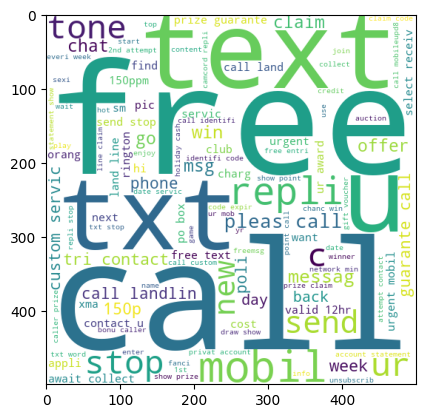

In [33]:
!pip install wordcloud
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))
plt.imshow(spam_wc)

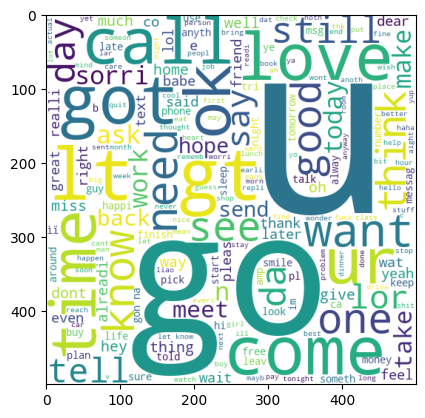

In [34]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))
plt.imshow(ham_wc)

In [35]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [36]:
len(spam_corpus)

9939

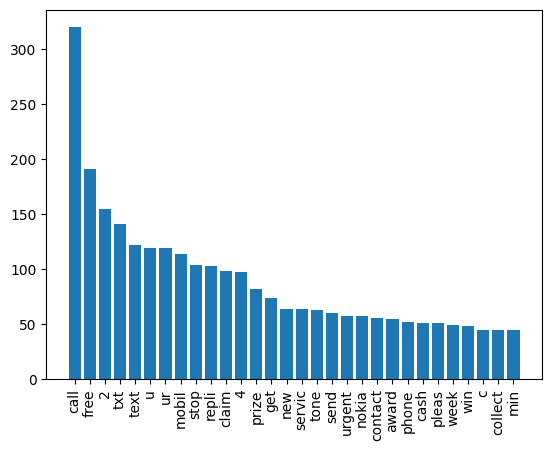

In [37]:
from collections import Counter
plt.bar(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [38]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [39]:
len(ham_corpus)

35404

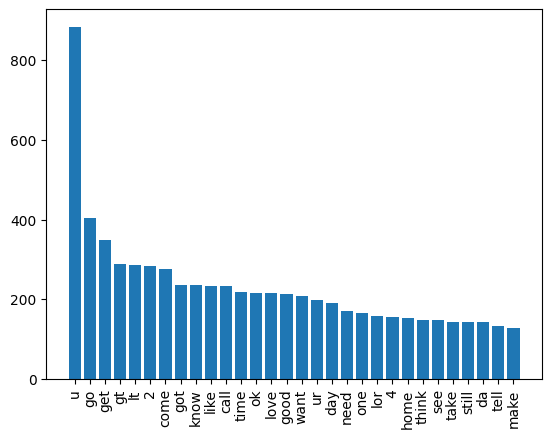

In [40]:
plt.bar(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

## 4. MODEL BUILDING

In [41]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [42]:
X=cv.fit_transform(df['transformed_text']).toarray()

In [43]:
X.shape

(5169, 6708)

In [44]:
y=df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0], shape=(5169,))

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [63]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB 
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [64]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [49]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1) )
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [50]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2) )
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [51]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3) )
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [60]:
#instead of bow,using tf-idf in same models.
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [65]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1) )
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [66]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2) )
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [67]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3) )
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [68]:
#AS PRECISION MATTERS IN CASE OF SPAM DETECTION, WE select tf-idf + mnb
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))